In [1]:
import stan_utility

In [2]:
model = stan_utility.compile_model_code("""
data {
  int N;
}
parameters {
  real<lower=-10.0, upper=10.0> x;
  real<lower=-10.0, upper=10.0> y;
}
model {
  target += -2 * (100 * square(y - square(x)) + square(1 - x));
}
""")

Using cached StanModel


In [3]:
data = dict(N=2)

In [4]:
results = stan_utility.sample_model(model, data, outprefix="rosenbrock")

In [12]:
%matplotlib inline

In [13]:
for k in results.posterior.data_vars.keys():
    print(k)

x
y


                   x: 0.9972 +- 0.5042
                   y: 1.2504 +- 1.0262
Removed no burn in


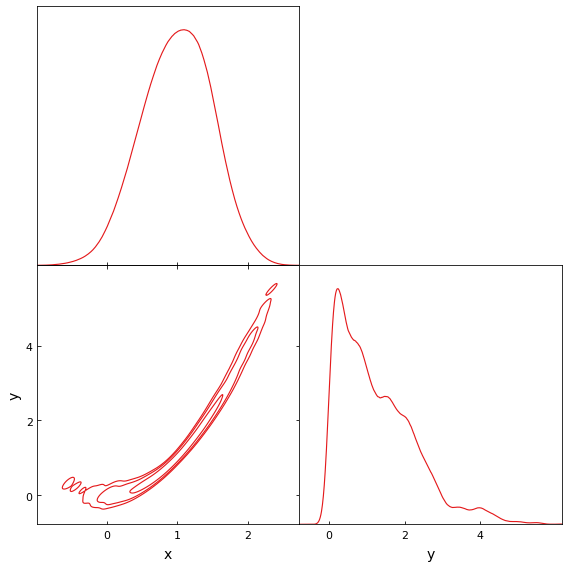

In [14]:
stan_utility.plot_corner(results)